# 문재인 대통령 2017.06.12. 국회 시정연설 전문 분석

In [31]:
with open('moon_170612.txt', 'r') as f:
    lines = f.read().splitlines()
print(lines[:3])

['존경하는 국민 여러분, 정세균 국회의장님과 의원 여러분. 19대 국회 때 바로 이 자리에서 당대표 연설을 했습니다. 20대 국회에서 인사드리는 것은 처음이지만, 19대 국회에서 함께 활동했던 분들이 많아서 친근한 동료의식을 갖고 있습니다.', '', '지난 5월 10일, 저는 국회에서 엄숙한 마음으로 대통령 취임선서를 했습니다. 오늘은 정부가 추가경정예산안을 편성한 이유와 주요 내용을 직접 설명드리고 의원 여러분의 이해와 협조를 부탁드리고자 이 자리에 섰습니다.']


In [32]:
# 빈 문장 '' 제거  / 빈칸이면 무시하고 출력해라.
sentences = [line for line in lines if line != '']


for line in lines[:3]:
    if line != '':
        print(line)

존경하는 국민 여러분, 정세균 국회의장님과 의원 여러분. 19대 국회 때 바로 이 자리에서 당대표 연설을 했습니다. 20대 국회에서 인사드리는 것은 처음이지만, 19대 국회에서 함께 활동했던 분들이 많아서 친근한 동료의식을 갖고 있습니다.
지난 5월 10일, 저는 국회에서 엄숙한 마음으로 대통령 취임선서를 했습니다. 오늘은 정부가 추가경정예산안을 편성한 이유와 주요 내용을 직접 설명드리고 의원 여러분의 이해와 협조를 부탁드리고자 이 자리에 섰습니다.


In [33]:
# komoran을 이용한 형태소 분석

from konlpy.tag import Komoran
tagger = Komoran()
tags = tagger.pos(sentences[0])

print(tags[:4])

[('존경', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('국민', 'NNG')]


In [34]:
tagged_sentences = [tagger.pos(sent) for sent in sentences]
tagged_sentences[0]

[('존경', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('국민', 'NNG'),
 ('여러분', 'NP'),
 (',', 'SP'),
 ('정세균', 'NNP'),
 ('국회의장', 'NNP'),
 ('님', 'XSN'),
 ('과', 'JC'),
 ('의원', 'NNG'),
 ('여러분', 'NP'),
 ('.', 'SF'),
 ('19', 'SN'),
 ('대', 'NNB'),
 ('국회', 'NNG'),
 ('때', 'NNG'),
 ('바로', 'MAG'),
 ('이', 'MM'),
 ('자리', 'NNG'),
 ('에서', 'JKB'),
 ('당', 'NNG'),
 ('대표', 'NNG'),
 ('연설', 'NNG'),
 ('을', 'JKO'),
 ('하', 'VV'),
 ('았', 'EP'),
 ('습니다', 'EF'),
 ('.', 'SF'),
 ('20', 'SN'),
 ('대', 'NNB'),
 ('국회', 'NNG'),
 ('에서', 'JKB'),
 ('인사', 'NNG'),
 ('드리', 'VV'),
 ('는', 'ETM'),
 ('것', 'NNB'),
 ('은', 'JX'),
 ('처음', 'NNG'),
 ('이', 'VCP'),
 ('지만', 'EC'),
 (',', 'SP'),
 ('19', 'SN'),
 ('대', 'NNB'),
 ('국회', 'NNG'),
 ('에서', 'JKB'),
 ('함께', 'MAG'),
 ('활동', 'NNG'),
 ('하', 'XSV'),
 ('았', 'EP'),
 ('던', 'ETM'),
 ('분', 'NNB'),
 ('들', 'XSN'),
 ('이', 'JKS'),
 ('많', 'VA'),
 ('아서', 'EC'),
 ('친근', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('동료', 'NNG'),
 ('의식', 'NNG'),
 ('을', 'JKO'),
 ('갖', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('습니다', 'EF

In [35]:
# 명사 리스트 만들어 보기 / 태그가 NNP, NNG로 시작하는 명사를 리스트
noun_list = []

for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
noun_list[:10]

['존경', '국민', '정세균', '국회의장', '의원', '국회', '때', '자리', '당', '대표']

In [36]:
# collection library를 이용하여 빈도수 계산하기
from collections import Counter

noun_counts = Counter(noun_list)
noun_counts.most_common(10)

[('일자리', 44),
 ('청년', 28),
 ('국민', 24),
 ('예산', 22),
 ('정부', 20),
 ('추경', 18),
 ('국회', 15),
 ('소득', 12),
 ('고용', 11),
 ('계층', 10)]

/Users/nanhee/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


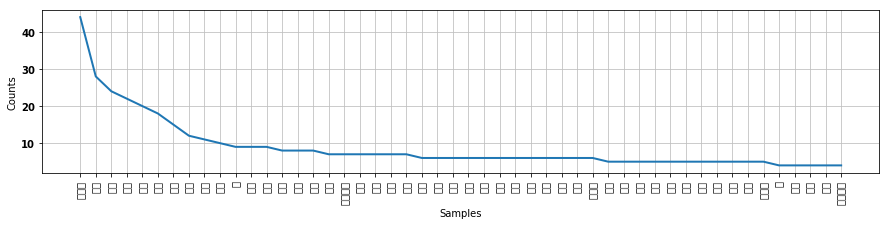

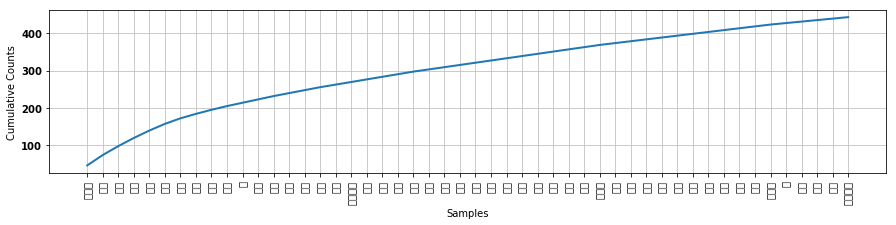

In [37]:
import nltk
import matplotlib.pyplot as plt # 결과를 시각화 하기 위한 matplotlib
%matplotlib inline

# word index 대신 word를 보여주는 그래프
freqdist = nltk.FreqDist(noun_counts)

plt.figure(figsize=(15,3))
freqdist.plot(50)

plt.figure(figsize=(15,3))
freqdist.plot(50,cumulative=True)

In [38]:
# 폰트 문제 해결
from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

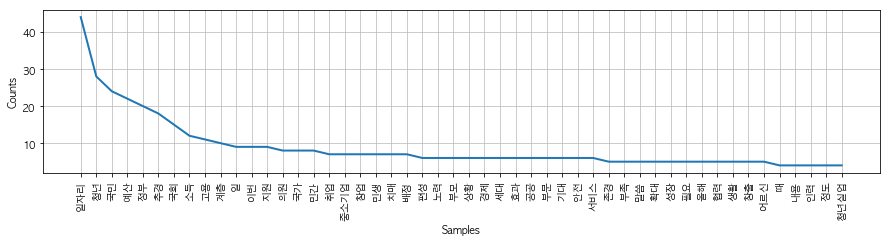

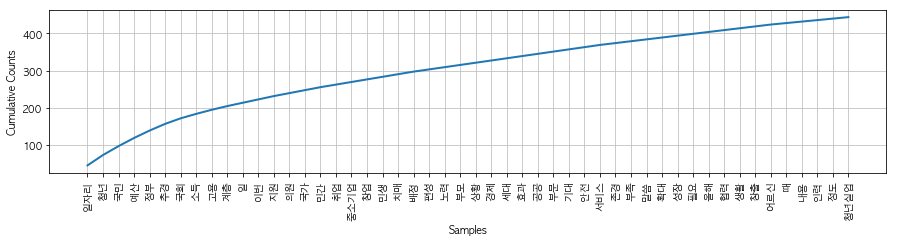

In [39]:
plt.figure(figsize=(15,3))
freqdist.plot(50)

plt.figure(figsize=(15,3))
freqdist.plot(50,cumulative=True)

In [40]:
# unique한 명사 리스트 만들기

unique_nouns = set()
unique_list = []

for sent in tagged_sentences:
    for word, tag in sent:
        if tag in ['NNP','NNG']:
            if word not in unique_list:
                unique_list.append(word)
                
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            unique_nouns.add(word)

unique_nouns = list(unique_nouns)
noun_index = {noun: i for i, noun in enumerate(unique_nouns)} # 딕셔너리 형태의 자료구조
#noun_index

### 문장-단어 행렬

In [41]:
import numpy as np
# 문장 길이 X 명사 종류 matrix 생성
occurs = np.zeros([len(tagged_sentences), len(unique_nouns)])
np.shape(occurs)

(71, 565)

In [42]:
for i, sent in enumerate(tagged_sentences):
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] = 1  # 문장 i의 index 자리에 1을 채워 넣는다.
            
occurs[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [43]:
# 공존 단어 행렬 계산
# i 번째 단어
co_occurs = occurs.T.dot(occurs)

In [44]:
for i in range(100):
    for j in range(100):
        if (co_occurs[i][j] > 1) & (i>j):
            print(unique_nouns[i], unique_nouns[j], co_occurs[i][j])

예산 이번 3.0
동시 예산 2.0
인력 동시 2.0
추경 이번 7.0
추경 예산 5.0
경험 예산 2.0
일자리 이번 5.0
일자리 예산 11.0
일자리 동시 3.0
일자리 인력 3.0
일자리 추경 9.0
일자리 계층 3.0
조금 예산 2.0
지원 이번 3.0
지원 예산 2.0
지원 추경 4.0
지원 일자리 3.0
말씀 일자리 2.0
세수 추경 2.0
과제 일자리 2.0
충원 예산 2.0
충원 일자리 2.0
근본 일자리 2.0
근본 과제 2.0
창출 이번 3.0
창출 예산 2.0
창출 추경 3.0
창출 일자리 5.0
창출 지원 2.0
안정 추경 2.0
안정 계층 2.0
안정 일자리 3.0
안정 창출 2.0
국회 예산 2.0
국회 추경 2.0
국회 일자리 4.0
국회 연설 2.0
노인 일자리 2.0
노력 일자리 3.0
노력 국회 2.0
사회 일자리 2.0
집중 일자리 2.0


### 네트워크 그리기

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 4:
            graph.add_edge(unique_nouns[i], unique_nouns[j])

In [47]:
krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
plt.rc('font',**krfont)

/Users/nanhee/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/nanhee/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/nanhee/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/nanhee/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

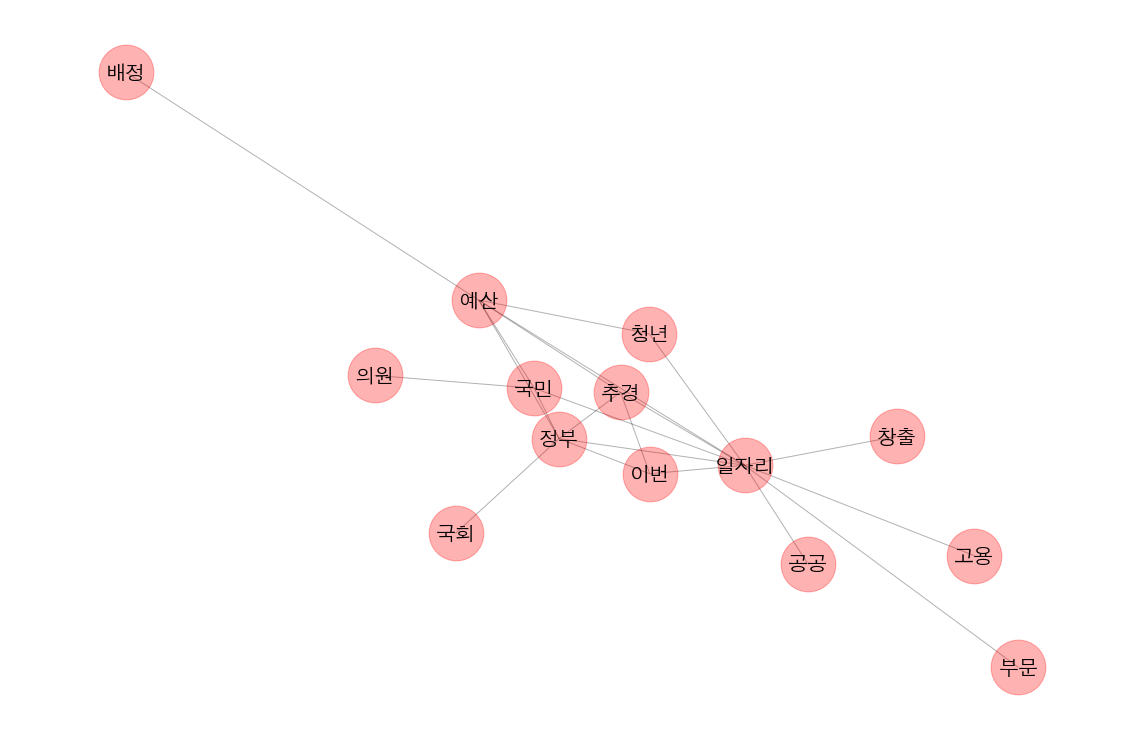

In [48]:
plt.figure(figsize=(15, 10))
layout = nx.spring_layout(graph, k=.1)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family='AppleGothic',
        alpha=0.3, node_size=3000)
plt.show()